In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydicom
%matplotlib inline

In [2]:
os.listdir('/media/ajays/Windows/rsna_data')

['stage_1_detailed_class_info.csv',
 'stage_1_detailed_class_info.csv.zip',
 'stage_1_sample_submission.csv',
 'stage_1_test_images',
 'stage_1_test_images.zip',
 'stage_1_train_images',
 'stage_1_train_images.zip',
 'stage_1_train_labels.csv',
 'stage_1_train_labels.csv.zip']

In [3]:
data_path = '/media/ajays/Windows/rsna_data/'
train_img_path = os.path.join(data_path,'stage_1_train_images')
train_csv = pd.read_csv(os.path.join(data_path,'stage_1_train_labels.csv'))
files = os.listdir(train_img_path)
files

['0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm',
 '00313ee0-9eaa-42f4-b0ab-c148ed3241cd.dcm',
 '00322d4d-1c29-4943-afc9-b6754be640eb.dcm',
 '003d8fa0-6bf1-40ed-b54c-ac657f8495c5.dcm',
 '00436515-870c-4b36-a041-de91049b9ab4.dcm',
 '00569f44-917d-4c86-a842-81832af98c30.dcm',
 '006cec2e-6ce2-4549-bffa-eadfcd1e9970.dcm',
 '00704310-78a8-4b38-8475-49f4573b2dbb.dcm',
 '008c19e8-a820-403a-930a-bc74a4053664.dcm',
 '009482dc-3db5-48d4-8580-5c89c4f01334.dcm',
 '009eb222-eabc-4150-8121-d5a6d06b8ebf.dcm',
 '00a85be6-6eb0-421d-8acf-ff2dc0007e8a.dcm',
 '00aecb01-a116-45a2-956c-08d2fa55433f.dcm',
 '00c0b293-48e7-4e16-ac76-9269ba535a62.dcm',
 '00d7c36e-3cdf-4df6-ac03-6c30cdc8e85b.dcm',
 '00f08de1-517e-4652-a04f-d1dc9ee48593.dcm',
 '00f87de5-5fe0-4921-93ea-914d7e683266.dcm',
 '0100515c-5204-4f31-98e0-f35e4b00004a.dcm',
 '01027bc3-dc40-4165-a6c3-d6be2cb7ca34.dcm',
 '010ccb9f-6d46-4380-af11-84f87397a1b8.dcm',
 '6bde463a-d52c-4730-9833-091fc1fef528.dcm',
 '6bdeb23a-a3ac-4490-a2ab-2857180671e1.dcm',
 '6bdfa91a

In [4]:
train_csv.head()

patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

In [5]:
# single file
img = pydicom.read_file(os.path.join(train_img_path,files[0]))
img

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0020) Patient ID                          LO: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient'

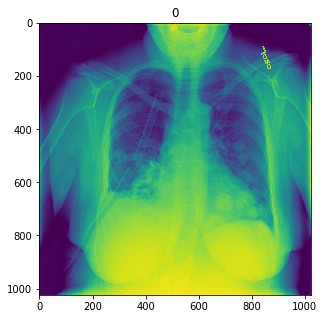

In [6]:
plt.figure(figsize = (5,5))
plt.imshow(img.pixel_array)
plt.title(train_csv.loc[train_csv['patientId']==files[0][:-4]].Target.values[0])
plt.show()

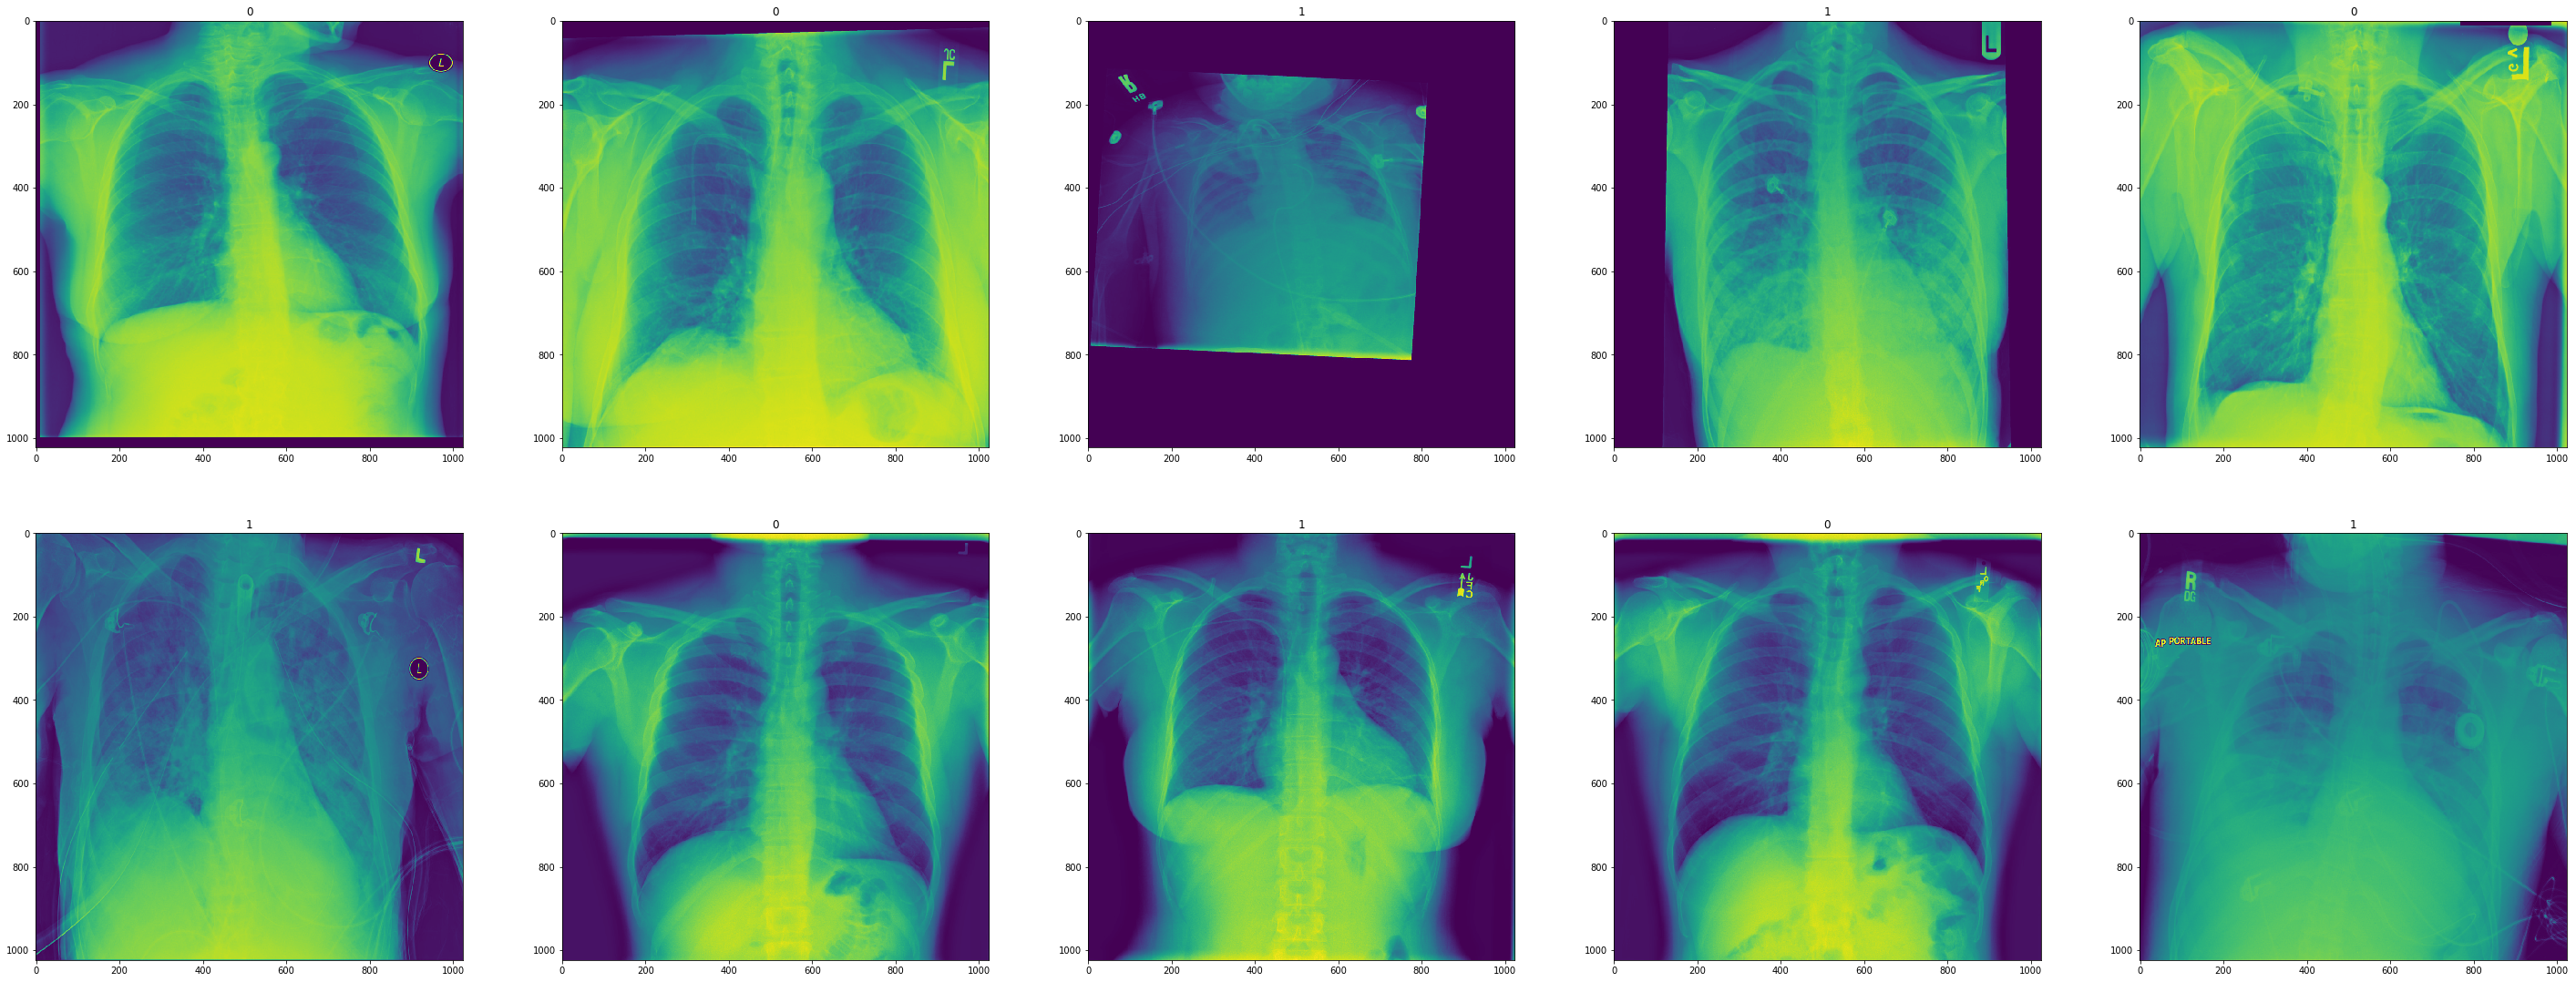

In [7]:
plt.figure(figsize=(50,50))
for i in range(10,20):
    plt.subplot(5,5,i+1)
    plt.imshow(pydicom.read_file(os.path.join(train_img_path,files[i])).pixel_array)
    plt.title(train_csv.loc[train_csv['patientId']==files[i][:-4]].Target.values[0])

In [8]:
pix = img.pixel_array
pix.shape

(1024, 1024)